In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tortilla-prices-in-mexico/tortilla_prices.csv


In [2]:
from pandas import read_csv
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
tortilla = pd.read_csv('/kaggle/input/tortilla-prices-in-mexico/tortilla_prices.csv')

In [5]:
tortilla.head(10)

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.0
6,Coahuila,Saltillo,2007,1,10,Mom and Pop Store,NaN
7,Colima,Colima,2007,1,10,Mom and Pop Store,10.0
8,Chiapas,Tapachula,2007,1,10,Mom and Pop Store,NaN
9,Chiapas,Tuxtla Gutiérrez,2007,1,10,Mom and Pop Store,9.2


In [6]:
tortilla.tail(10)

,State,City,Year,Month,Day,Store type,Price per kilogram
278876,Tamaulipas,Matamoros,2024,3,1,Big Retail Store,15.20
278877,Tamaulipas,Nuevo Laredo,2024,3,1,Big Retail Store,16.90
278878,Tamaulipas,Reynosa,2024,3,1,Big Retail Store,16.06
278879,Tamaulipas,Tampico,2024,3,1,Big Retail Store,14.23
278880,Tlaxcala,Tlaxcala,2024,3,1,Big Retail Store,13.30
278881,Veracruz,Coatzacoalcos,2024,3,1,Big Retail Store,12.50
278882,Veracruz,Veracruz,2024,3,1,Big Retail Store,13.57
278883,Veracruz,Xalapa,2024,3,1,Big Retail Store,13.97
278884,Yucatán,Mérida,2024,3,1,Big Retail Store,13.20
278885,Zacatecas,Zacatecas,2024,3,1,Big Retail Store,13.33


In [7]:
tortilla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278886 entries, 0 to 278885
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               278886 non-null  object 
 1   City                278886 non-null  object 
 2   Year                278886 non-null  int64  
 3   Month               278886 non-null  int64  
 4   Day                 278886 non-null  int64  
 5   Store type          278886 non-null  object 
 6   Price per kilogram  272496 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 14.9+ MB


In [8]:
# get the number of missing data points per column
missing_values_count = tortilla.isnull().sum()

In [9]:
missing_values_count

State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64

In [10]:
# Remove rows with any NaN values
tortilla_clean = tortilla.dropna()

In [11]:
tortilla_clean

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.00
...,...,...,...,...,...,...,...
278881,Veracruz,Coatzacoalcos,2024,3,1,Big Retail Store,12.50
278882,Veracruz,Veracruz,2024,3,1,Big Retail Store,13.57
278883,Veracruz,Xalapa,2024,3,1,Big Retail Store,13.97
278884,Yucatán,Mérida,2024,3,1,Big Retail Store,13.20


In [12]:
# Remove duplicate rows based on all columns
tortilla_clean_unique = tortilla_clean.drop_duplicates()

In [13]:
tortilla_clean_unique

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.00
...,...,...,...,...,...,...,...
278881,Veracruz,Coatzacoalcos,2024,3,1,Big Retail Store,12.50
278882,Veracruz,Veracruz,2024,3,1,Big Retail Store,13.57
278883,Veracruz,Xalapa,2024,3,1,Big Retail Store,13.97
278884,Yucatán,Mérida,2024,3,1,Big Retail Store,13.20


In [14]:
tortilla_clean_unique.describe()

,Year,Month,Day,Price per kilogram
count,272496.000000,272496.000000,272496.000000,272496.000000
mean,2015.018195,6.381565,15.947691,12.054586
std,4.918549,3.453425,8.755636,4.336487
min,2007.000000,1.000000,1.000000,0.000000
25%,2011.000000,3.000000,8.000000,9.570000
50%,2015.000000,6.000000,16.000000,11.170000
75%,2019.000000,9.000000,24.000000,14.000000
max,2024.000000,12.000000,31.000000,31.000000


In [15]:
tortilla_clean_unique.shape

(272496, 7)

Data Visualization

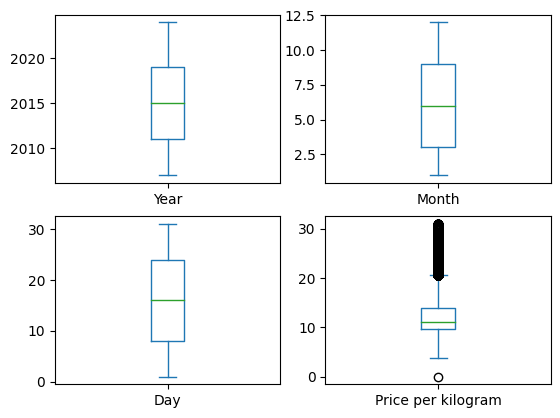

In [16]:
# box and whisker plots
tortilla_clean_unique.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

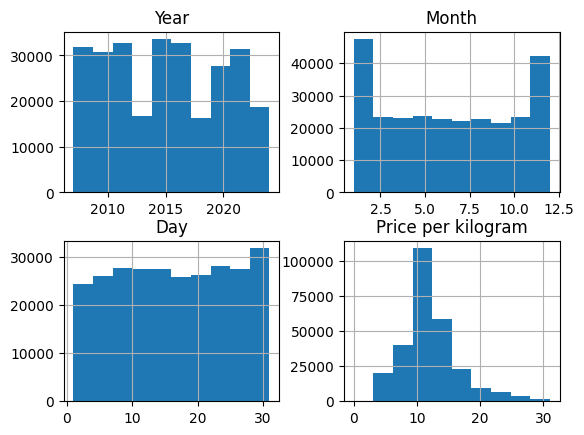

In [17]:
# histograms
tortilla_clean_unique.hist()
plt.show()

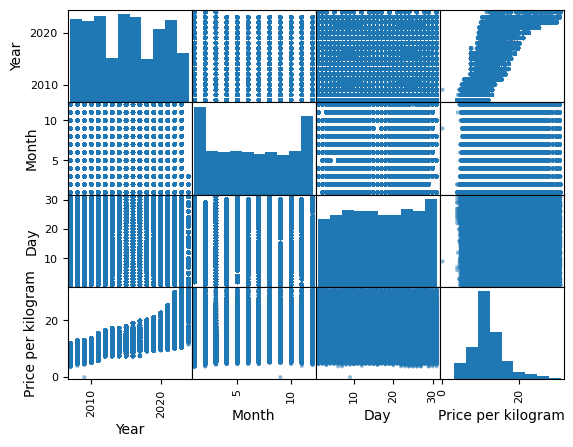

In [18]:
# scatter plot matrix
scatter_matrix(tortilla_clean_unique)
plt.show()

In [19]:
tortilla_clean_unique.columns

Index(['State', 'City', 'Year', 'Month', 'Day', 'Store type',
       'Price per kilogram'],
      dtype='object')

* Linear Regression
* RandomForestRegressor with a reduced number of estimators to speed up the process.
* Decision Tree Regressor – typically faster than RandomForestRegressor as it consists of a single tree.
* Support Vector Machine for regression (SVR) – though potentially slow for very large datasets, it can be very effective for certain types of data.

A mean squared error (MSE) of approximately 3.06 for the Linear Regression model indicates the average squared difference between the estimated values and the actual value

Model Training and Evaluation

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
data = tortilla_clean_unique

# Fill missing numeric values with the median
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Convert categorical variables to numeric by one-hot encoding
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
data = pd.get_dummies(data, columns=categorical_cols)

# Define the features (X) and the target variable (y)
X = data.drop('Price per kilogram', axis=1)  # Assuming 'Price per kilogram' is the target
y = data['Price per kilogram']

# Split the data into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Example model training and evaluation with Linear Regression
model = LinearRegression()
model.fit(X_train, Y_train)

# Predicting on the validation set
Y_pred = model.predict(X_validation)

# Calculating the mean squared error
mse = mean_squared_error(Y_validation, Y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.0607495801845697


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=10, random_state=1),  # Reduced number of estimators
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=1),
    'SVR': SVR()
}

# Dictionary to hold model performance
model_performance = {}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_validation)
    mse = mean_squared_error(Y_validation, Y_pred)
    model_performance[name] = mse
    print(f'{name} Mean Squared Error: {mse}')

Linear Regression Mean Squared Error: 3.0607495801845697
Random Forest Regressor Mean Squared Error: 0.01638004117431192
Decision Tree Regressor Mean Squared Error: 0.021262137614678888


RandomForestRegressor using GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Re-evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best Model - MSE: {mse}, R2: {r2}")

In [ ]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()